<a href="https://colab.research.google.com/github/itberrios/CV_projects/blob/main/denoising/marine_denoising.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Marine Denoising 🌊**

In this notebook we will learn about problems encountered with putting Cameras on Marine Vehicles. And we will learn some methods of overcoming these problems.


### Issue 1: **Turbitity ✨**
Turbidity is the cloudiness of water and typically makes the visibility range very short.

<br>


### Issue 2: **Marine Snow 🌊 ❄️**
Marine Snow is a concentration of organic particles suspended in the water. Discerning the environment from an image with a dense concentration of Marine Snow very challenging.

<br>

#### Refs:
- https://en.wikipedia.org/wiki/Turbidity
- https://en.wikipedia.org/wiki/Marine_snow

In [1]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt

%matplotlib inline

Load images

In [86]:
turbidity = cv2.cvtColor(cv2.imread('/content/turbidity.png'), cv2.COLOR_BGR2RGB)
marine_snow = cv2.cvtColor(cv2.imread('/content/marine_snow.png'), cv2.COLOR_BGR2RGB)

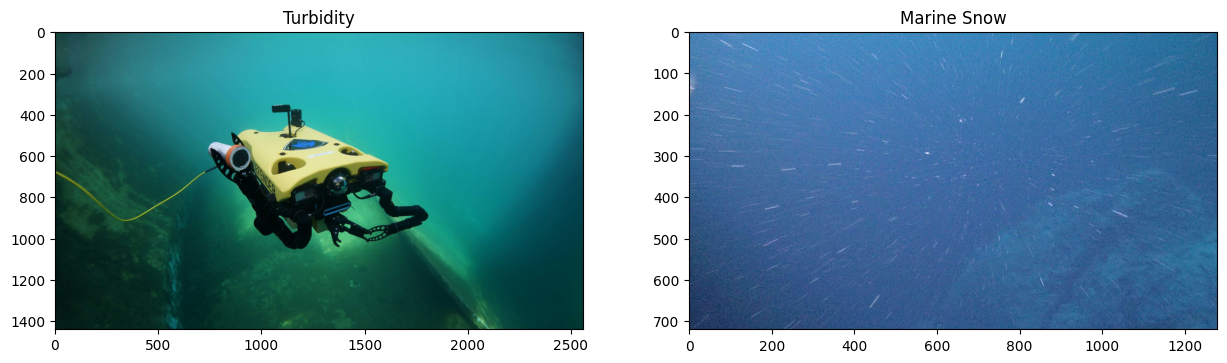

In [87]:
_, ax = plt.subplots(1, 2, figsize=(15,5))
ax[0].imshow(turbidity)
ax[0].set_title('Turbidity')
ax[1].imshow(marine_snow)
ax[1].set_title('Marine Snow');

## Process Turbidity

The main goal of processing the turbidity image is to improve the range of visibility

Try histogram equalization

In [96]:
turbidity_eq = turbidity.copy() # cv2.merge([cv2.equalizeHist(turbidity[:, :, 0]), cv2.equalizeHist(turbidity[:, :, 1]), cv2.equalizeHist(turbidity[:, :, 2])])

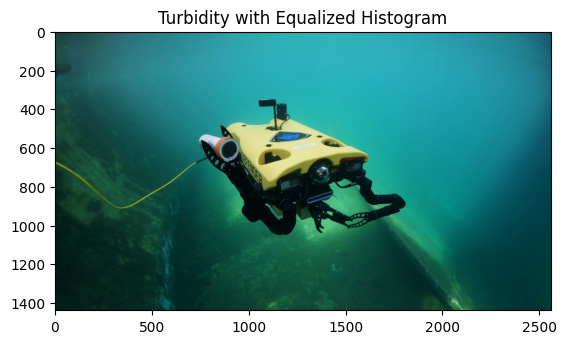

In [97]:
plt.imshow(turbidity_eq )
plt.title("Turbidity with Equalized Histogram");

Remove the brightness on the luminance channel

In [98]:
turbidity_eq_ycrcb = cv2.cvtColor(turbidity_eq, cv2.COLOR_RGB2YCrCb)
turbidity_luminance = turbidity_eq_ycrcb[:, :, 0]

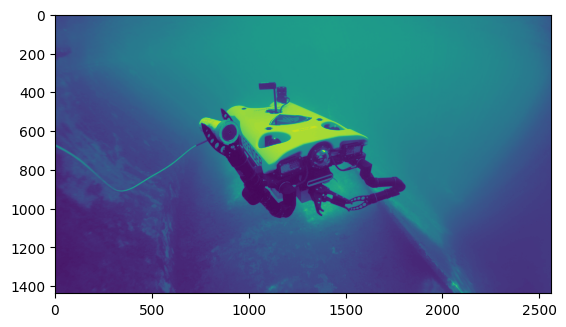

In [99]:
plt.imshow(turbidity_eq_ycrcb[:, :, 0]);

In [100]:
turbidity_eq_ycrcb[:, :, 0] = np.uint8(turbidity_eq_ycrcb[:, :, 0]/8)

turbidity_recon = cv2.cvtColor(turbidity_eq_ycrcb.astype(np.uint8), cv2.COLOR_YCrCb2RGB)

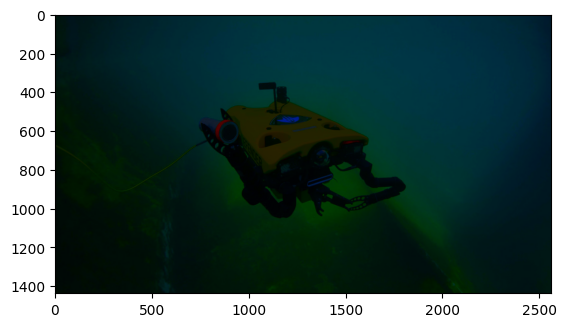

In [101]:
plt.imshow(turbidity_recon)

In [102]:
turbidity_recon = cv2.merge([cv2.equalizeHist(turbidity_recon [:, :, 0]),
                             cv2.equalizeHist(turbidity_recon [:, :, 1]),
                             cv2.equalizeHist(turbidity_recon [:, :, 2])])

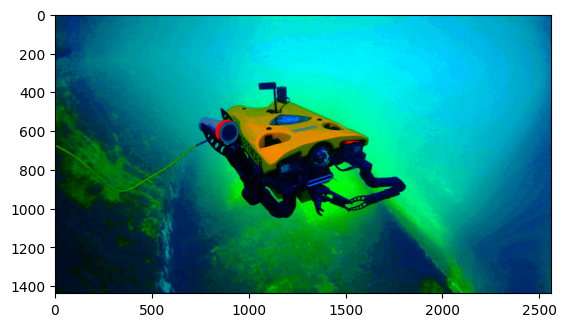

In [103]:
plt.imshow(turbidity_recon)

## **Denoise Marine Snow**

The main goal of denoising the Marine Snow is to remove the noise and increase the ability to discern the content of the image

Steps:
- Convert to YCrCb
- test each pixel with a 7x7 window
- check if test pixel exceeds a threshold: thrseh = mu + 0.5*sigma (where mu and sigma are local statisics of the current window

In [38]:
marine_snow_ycrcb = cv2.cvtColor(marine_snow, cv2.COLOR_RGB2YCrCb)
luminance = marine_snow_ycrcb[:, :, 0]

plt.imshow(luminance)
plt.title("Luminance Channel of Marine Snow Image");

TypeError: ignored

In [18]:
marine_snow_ycrcb.shape

(720, 1279, 3)

In [37]:
kernel = np.ones((7,7), dtype=np.uint8)

In [ ]:
cv2.filter2D()